## Project: Learn building interactive choropleth maps

### Goal:
* Build interactive maps using - Pandas, Geo Pandas & Bokeh
* Plot Choropleth Map showing Adult Obesity

**DataSet:**<br>
1. Data : Adult Obesity (csv):
    - **Source**: Natural Earth</p>
Natural Earth is a public domain map dataset built through a collaboration of many volunteers and is supported by NACIS (North American Cartographic Information Society), and is free for use in any type of project</p>
    - **Page**: https://www.naturalearthdata.com/downloads/110m-cultural-vectors/
    - **File**: https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip
<br>
2. World Shape file (shp):
    * **Source**: Our World in Data</p>
Research and data to make progress against the world’s largest problems. All free: open access and open source.</p>
    * **Page**: https://ourworldindata.org/obesity
    * **File**: blob:https://ourworldindata.org/838a979d-f642-1c42-a716-7ec1d05557fc

### Step 1: Import Adult Obesity data file, clean, format and study

In [1]:
import pandas as pd

In [2]:
#Define the data file
obesity_datafile = 'data-world-obesity/share-of-adults-defined-as-obese.csv'

#Read csv file using pandas
df = pd.read_csv(obesity_datafile, names = ['entity', 'code', 'year', 'per_cent_obesity'], skiprows = 1)

#Preview imported data
df.head()

,entity,code,year,per_cent_obesity
0,Afghanistan,AFG,1975,0.5
1,Afghanistan,AFG,1976,0.5
2,Afghanistan,AFG,1977,0.6
3,Afghanistan,AFG,1978,0.6
4,Afghanistan,AFG,1979,0.6


In [3]:
#Review the quality of data file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8316 entries, 0 to 8315
Data columns (total 4 columns):
entity              8316 non-null object
code                7980 non-null object
year                8316 non-null int64
per_cent_obesity    8316 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 260.0+ KB


In [4]:
#Review records with code = null
missing_df = df[df['code'].isnull()]

#Study the entities whose code are null
missing_df['entity'].value_counts()

South-East Asia          42
Western Pacific          42
Europe                   42
Sudan (former)           42
Americas                 42
Africa                   42
Eastern Mediterranean    42
Global                   42
Name: entity, dtype: int64

In [5]:
#To keep it simple, let us ignore the missing data for now.
#This will be achieved by the way we merge and deal with the missing data during the merge step later.

### Step 2: Import the shape file and preview

In [6]:
import geopandas as gpd

In [7]:
#Define the shape file
world_shapefile = 'world-shape/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'

#Read shapefile using Geopandas
geo_df = gpd.read_file(world_shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]

#Rename columns.
geo_df.columns = ['country', 'country_code', 'geometry']
geo_df.head()

,country,country_code,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


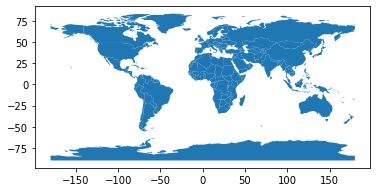

In [8]:
#Preview the world shape file
geo_df.plot()

In [9]:
#Drop the row for ‘Antarctica’ as it unnecessarily occupies a large space in our map and not required in this context
print(geo_df[geo_df['country'] == 'Antarctica'])

        country country_code  \
159  Antarctica          ATA   

                                              geometry  
159  MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...  


In [10]:
#Drop row corresponding to 'Antarctica'
geo_df = geo_df.drop(geo_df.index[159])

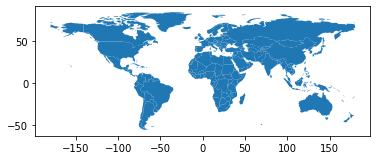

In [11]:
#Preview the world shape file without Antarctica
geo_df.plot()

### Step 3: Build a static map say for year 2016

In [12]:
#Filter obesity data for year 2016.
df_2016 = df[df['year'] == 2016]

In [13]:
#Merge dataframes geo_df and df_2016.
#Remember we don't care about the missing codes on the obesity data file

#Perform left merge to preserve every row in gdf.
merged = geo_df.merge(df_2016, left_on = 'country_code', right_on = 'code', how = 'left')

merged.head()

,country,country_code,geometry,entity,code,year,per_cent_obesity
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,FJI,2016.0,30.2
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,TZA,2016.0,8.4
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,CAN,2016.0,29.4
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,USA,2016.0,36.2


In [14]:
#Result df is a geopandas dataframe object
merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 176 entries, 0 to 175
Data columns (total 7 columns):
country             176 non-null object
country_code        176 non-null object
geometry            176 non-null geometry
entity              163 non-null object
code                163 non-null object
year                163 non-null float64
per_cent_obesity    163 non-null float64
dtypes: float64(2), geometry(1), object(4)
memory usage: 11.0+ KB


In [15]:
#Replace missing obesity data on the map as 'No data'
merged.isna()

,country,country_code,geometry,entity,code,year,per_cent_obesity
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,True,True,True,True
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
171,False,False,False,False,False,False,False
172,False,False,False,False,False,False,False
173,False,False,False,True,True,True,True
174,False,False,False,False,False,False,False


In [16]:
#Replace NaN values to string 'No data' or 0 based on its data type.  
#Note, missing data will be marked with low color value.  This is a design decision to ignore it.

merged.fillna({'entity': 'No data', 'code': 'No data', 'year': 'No data', 'per_cent_obesity': -1}, inplace = True)
merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 176 entries, 0 to 175
Data columns (total 7 columns):
country             176 non-null object
country_code        176 non-null object
geometry            176 non-null geometry
entity              176 non-null object
code                176 non-null object
year                176 non-null object
per_cent_obesity    176 non-null float64
dtypes: float64(1), geometry(1), object(5)
memory usage: 11.0+ KB


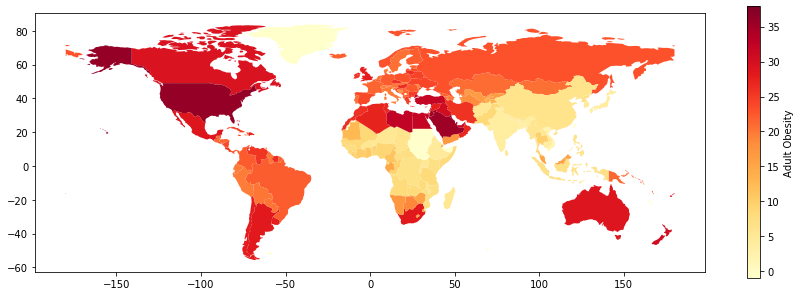

In [17]:
#Preview result using geopandas plot
merged.plot(column='per_cent_obesity', figsize=(15,5), cmap='YlOrRd', legend=True,
            legend_kwds={'label': "Adult Obesity",'orientation': "vertical"})

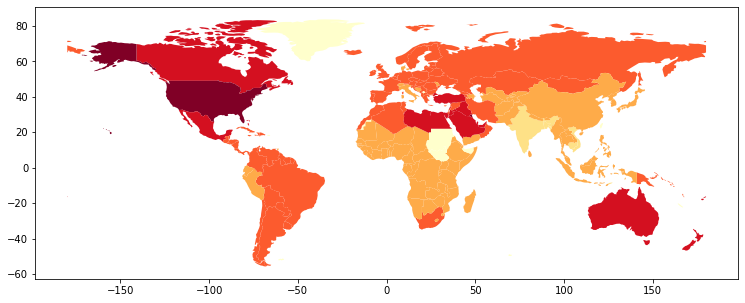

In [18]:
#Preview result using geopandas plot with schema
merged.plot(column='per_cent_obesity', figsize=(15,5), cmap='YlOrRd', scheme='percentiles')  

# Other interesting schemes - percentiles, quantiles, fisherjenks, equalinterval

### Scheme must be in the set: 
# dict_keys(['boxplot', 'equalinterval', 'fisherjenks', 'fisherjenkssampled', '
# headtailbreaks', 'jenkscaspall', 'jenkscaspallforced', 'jenkscaspallsampled', 'maxp', 'maximumbreaks', 
# 'naturalbreaks', 'quantiles', 'percentiles', 'stdmean', 'userdefined'])

In [19]:
#Use Bokeh to render static map, later can add interactivity easily

# Bokeh consumes GeoJSON format which represents geographical features with JSON. 
# GeoJSON describes points, lines and polygons (called Patches in Bokeh) as a collection of features. 
# We therefore convert the merged file to GeoJSON format.

In [20]:
import json
import pprint as pp

In [21]:
#Read data to json.
merged_json = json.loads(merged.to_json())
print(type(merged_json))
pp.pprint(merged_json, depth=1)

#Convert to String like object.
json_data = json.dumps(merged_json)
print(type(json_data))
print(json_data[:200])

<class 'dict'>
{'features': [...], 'type': 'FeatureCollection'}
<class 'str'>
{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"code": "FJI", "country": "Fiji", "country_code": "FJI", "entity": "Fiji", "per_cent_obesity": 30.2, "year": 20


In [22]:
#Render our choropleth map using Bokeh
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer

In [23]:
#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)

#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]

#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40)

#Define custom tick labels for color bar.
tick_labels = {'0': '0%', '5': '5%', '10':'10%', '15':'15%', '20':'20%', '25':'25%', 
               '30':'30%','35':'35%', '40': '>40%'}

#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width=725, height=10,
border_line_color=None, location=(0,0), orientation='horizontal', major_label_overrides=tick_labels)

#Create figure object.
p = figure(title = 'Share of adults who are obese, 2016', plot_height=400 , plot_width=800, toolbar_location=None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource, fill_color = {'field':'per_cent_obesity', 'transform':color_mapper},
          line_color='black', line_width=0.25, fill_alpha=1)

#Specify figure layout.
p.add_layout(color_bar, 'below')

#Display figure inline in Jupyter Notebook.
output_notebook()

#Display figure.
show(p)

Loading BokehJS ...

### Step 4: Build interactive map based on year selected in the range of 1975–2016

In [24]:
from bokeh.io import curdoc, output_notebook
from bokeh.models import Slider, HoverTool
from bokeh.layouts import widgetbox, row, column

In [25]:
#Define function that returns json_data for year selected by user.
    
def get_year_json_data(selectedYear):
    yr = selectedYear
    df_yr = df[df['year'] == yr]
    merged = geo_df.merge(df_yr, left_on='country_code', right_on='code', how='left')
    merged.fillna({'entity':'No data', 'code':'No data', 'year':'No data', 'per_cent_obesity':-1}, inplace=True)
    merged_json = json.loads(merged.to_json())
    json_data = json.dumps(merged_json)
    return json_data

In [26]:
#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = get_year_json_data(2016))

In [27]:
#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]

#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors. Input nan_color.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40, nan_color = '#d9d9d9')

#Define custom tick labels for color bar.
tick_labels = {'0': '0%', '5': '5%', '10':'10%', '15':'15%', '20':'20%', '25':'25%', 
               '30':'30%','35':'35%', '40': '>40%'}

In [28]:
#Add hover tool
hover = HoverTool(tooltips = [ ('Country/region','@country'),('% obesity', '@per_cent_obesity')])

In [29]:
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width=500, height=20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal', 
                     major_label_overrides = tick_labels)

#Create figure object.
p = figure(title = 'Share of adults who are obese, 2016', plot_height=600 , plot_width=950, 
           toolbar_location = None, tools = [hover])
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'per_cent_obesity', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)

p.add_layout(color_bar, 'below')

In [30]:
# Define the callback function: update_plot
def update_plot(attr, old, new):
    yr = slider.value
    new_data = get_year_json_data(yr)
    geosource.geojson = new_data
    p.title.text = 'Share of adults who are obese, %d' %yr

In [31]:
# Make a slider object: slider 
slider = Slider(title='Year', start=1975, end=2016, step=1, value=2016)
slider.on_change('value', update_plot)

In [32]:
# Make a column layout of widgetbox(slider) and plot, and add it to the current document
layout = column(p, widgetbox(slider))
curdoc().add_root(layout)

#Display plot inline in Jupyter notebook
output_notebook()

#Display plot
show(layout)

Loading BokehJS ...

You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/interaction/callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/server.html



To view this application in interactive mode you need to set up a local Bokeh server. 
Open a command line window in your current directory and execute command.

In [ ]:
# bokeh serve --show filename.ipynb

Alternatively, this can be achieved by define two ColumnDataSources: source_visible and source_available where the first one holds the data that is currently being shown in the plot and the second one acts as a data repository from where we can sample data in CustomJS callback based on user selection